In [53]:
import numpy as np
import sympy as smp

In [54]:
q1,q2,q3,L1,L2,L3,L4,L5=smp.symbols('q_1 q_2 q_3 L_1 L_2 L_3 L_4 L_5',real=True)

In [55]:
T1=smp.Matrix([[smp.cos(q1), -smp.sin(q1),0,L2*smp.cos(q1)],
[smp.sin(q1), smp.cos(q1),0,L2*smp.sin(q1)],
[0,0,1,L1],
[0,0,0,1]])

T2=smp.Matrix([[1,0,0,-L4]
,[0,smp.cos(q2), -smp.sin(q2),-L3*smp.sin(q2)]
,[0,smp.sin(q2), smp.cos(q2),L3*smp.cos(q2)]
,[0,0,0,1]])

T3=smp.Matrix([[1,0,0,0]
,[0,smp.cos(q3), -smp.sin(q3),-L5*smp.sin(q3)]
,[0,smp.sin(q3), smp.cos(q3),L5*smp.cos(q3)]
,[0,0,0,1]])

In [56]:
T=T1*T2*T3
T.simplify()

In [57]:
x,y,z=smp.symbols('x y z')
smp.print_latex(smp.Matrix([x,y,z]))

\left[\begin{matrix}x\\y\\z\end{matrix}\right]


In [58]:
T_func = smp.lambdify((q1,q2,q3,L1,L2,L3,L4,L5), T, modules='numpy')

In [59]:
T_func(0.3802009449316737,-3.110119590388556, 2.0943951023931957,1,1,1,1,1)[:3,3]

array([-0.32706796,  0.81839472,  0.52749959])

## Puntos Singulares

In [65]:
import matplotlib.pyplot as plt

In [66]:
Xacobeo=T[:3,3].jacobian([q1,q2,q3])

In [92]:
smp.print_latex(Xacobeo)

\left[\begin{matrix}- L_{2} \sin{\left(q_{1} \right)} + L_{3} \sin{\left(q_{2} \right)} \cos{\left(q_{1} \right)} + L_{4} \sin{\left(q_{1} \right)} + L_{5} \sin{\left(q_{2} + q_{3} \right)} \cos{\left(q_{1} \right)} & L_{3} \sin{\left(q_{1} \right)} \cos{\left(q_{2} \right)} + L_{5} \sin{\left(q_{1} \right)} \cos{\left(q_{2} + q_{3} \right)} & L_{5} \sin{\left(q_{1} \right)} \cos{\left(q_{2} + q_{3} \right)}\\L_{2} \cos{\left(q_{1} \right)} + L_{3} \sin{\left(q_{1} \right)} \sin{\left(q_{2} \right)} - L_{4} \cos{\left(q_{1} \right)} + L_{5} \sin{\left(q_{1} \right)} \sin{\left(q_{2} + q_{3} \right)} & - L_{3} \cos{\left(q_{1} \right)} \cos{\left(q_{2} \right)} - L_{5} \cos{\left(q_{1} \right)} \cos{\left(q_{2} + q_{3} \right)} & - L_{5} \cos{\left(q_{1} \right)} \cos{\left(q_{2} + q_{3} \right)}\\0 & - L_{3} \sin{\left(q_{2} \right)} - L_{5} \sin{\left(q_{2} + q_{3} \right)} & - L_{5} \sin{\left(q_{2} + q_{3} \right)}\end{matrix}\right]


In [93]:
smp.print_latex(Xacobeo.det().simplify())

L_{3} L_{5} \left(L_{3} \sin{\left(q_{2} \right)} + L_{5} \sin{\left(q_{2} + q_{3} \right)}\right) \sin{\left(q_{3} \right)}


In [68]:
def tra(q2,q3):
    return np.sin(q2) +np.sin(q2+q3)

In [98]:
yc=np.linspace(-4,4,2000)
xc=np.linspace(-4,4,2000)
Xc,Yc=np.meshgrid(xc,yc)

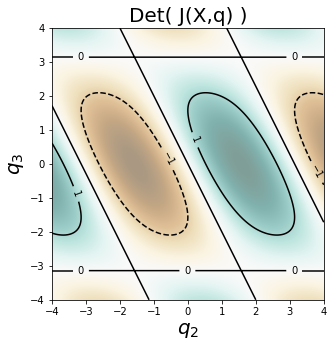

In [100]:
# ref,axo=plt.subplots(1,1,figsize=(10,10))
# fra=axo.contour(X,Y,tra(X,Y),levels=15,linewidths=3,cmap='coolwarm')
# axo.clabel(fra,fontsize=15)

fig,ax=plt.subplots(figsize=(5,5))

cs = ax.contour(Xc, Yc,tra(Xc,Yc), 3, colors='black')
ax.clabel(cs, fontsize=10)

ax.imshow(tra(Xc,Yc), extent=[-4, 4, -4, 4], origin='lower',cmap='BrBG', alpha=0.5)
ax.set_xlabel('$q_2$',fontsize=20)
ax.set_ylabel('$q_3$',fontsize=20)
plt.title('Det( J(X,q) )',fontsize=20)

plt.savefig('Determinante Jacobiano.png',dpi=200)